In [2]:
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [3]:
# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [4]:
# Otimização de Hiperparâmetros
import optuna

In [5]:
# Carregar datasets
df_segmento = pd.read_csv('./datasets/segmento_clientes.csv')

# EDA

In [6]:
# Visualizar os dados
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [7]:
# Estrutura do datasets
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [8]:
# Valores possíveis - Variáveis Categóricas
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [9]:
# Valores possíveis - Variáveis Categóricas
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [10]:
# Valores possíveis - Variáveis Categóricas
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [11]:
# Valores possíveis - Variáveis Categóricas
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [12]:
df_segmento.describe()

,faturamento_mensal,numero_de_funcionarios,idade,inovacao
count,5.000000e+02,500.000000,500.000000,500.00000
mean,1.026716e+06,13.690000,9.254000,4.38800
std,4.206095e+05,3.122403,2.959561,2.90281
min,1.842122e+04,2.000000,0.000000,0.00000
25%,7.632536e+05,12.000000,7.000000,2.00000
50%,1.022957e+06,14.000000,9.000000,4.00000
75%,1.295889e+06,16.000000,11.000000,7.00000
max,2.390677e+06,21.000000,16.000000,9.00000


In [13]:
# Distribuição da variável target - Segmento de Cliente
contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [14]:
# Criar uma lista ordenada do target
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [15]:
# Distribuição da variável target - Contagem
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [16]:
# Distribuição de variável target - Percentual
percentual_target = contagem_target / len(df_segmento) * 100
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [17]:
# Distribuição de variável Localização
percentual_localização = df_segmento.value_counts('localizacao') / len(df_segmento) * 100
px.bar(percentual_localização, color=percentual_localização.index)

In [18]:
# Distribuição de variável atividade econômica
percentual_atividade = df_segmento.value_counts('atividade_economica') / len(df_segmento) * 100
px.bar(percentual_atividade, color=percentual_atividade.index)

In [19]:
# Distribuição de variável inovação
percentual_inovacao = df_segmento.value_counts('inovacao') / len(df_segmento) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index)

In [20]:
# Tabela de contingência entre Localização e Target
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()
tabela_localizacao = ff.create_table(crosstab_localizacao)

# mostrar a tabela
tabela_localizacao.show()

In [21]:
# Tabela de contingência entre Atividade e Target
crosstab_atividade = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()
tabela_atividade = ff.create_table(crosstab_atividade)

# mostrar a tabela
tabela_atividade.show()

In [22]:
# Tabela de contingência entre Inovação e Target
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()
tabela_inovacao = ff.create_table(crosstab_inovacao)

# mostrar a tabela
tabela_inovacao.show()

In [23]:
# Distribuição - Idade Empresa
px.histogram(df_segmento, x='idade')

In [24]:
# Distribuição - Faturamento Mensal
px.histogram(df_segmento, x='faturamento_mensal')

In [25]:
# Box-Plot - entre idade e segmento
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [26]:
# Box-Plot - entre faturamento e segmento
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [27]:
# Teste de Qui-Quadrado de Pearson
# H0 - as variáveis são independentes
# H1 - as variáveis não são independentes
# Se P-Value > 0.05, aceita a hipótese nula, caso contrário rejeita

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao') 

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.



In [28]:
# Valor Esperado => Frequência que seria esperado se não houvesse associação entre as variáveis. É calculado utilizando a distribuição assumida no teste qui-quadrado
valor_esperado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [29]:
# Valor Observado => É a frequência real dos dados coletados (dataset)
valor_observado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [30]:
# Estatísticas
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,5.19335,9.0,0.81714,0.05884,0.11369
1,cressie-read,0.66667,5.19198,9.0,0.81726,0.05883,0.11367
2,log-likelihood,0.00000,5.19713,9.0,0.81680,0.05886,0.11374
3,freeman-tukey,-0.50000,5.20798,9.0,0.81581,0.05892,0.11390
4,mod-log-likelihood,-1.00000,5.22494,9.0,0.81428,0.05902,0.11414
5,neyman,-2.00000,5.27777,9.0,0.80945,0.05932,0.11490


 As variáveis *localização* e *segmento de clientes* são independentes. Qui-Quadrado (p-value = 0.81714)

In [31]:
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'atividade_economica')  

display(valor_esperado)
display(valor_observado)
display(estatisticas)

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7409: RuntimeWarning:

divide by zero encountered in power

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7409: RuntimeWarning:

invalid value encountered in multiply

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7406: RuntimeWarning:

divide by zero encountered 

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47.672,56.156,49.288,48.884
Gold,3.776,4.448,3.904,3.872
Silver,61.360,72.280,63.440,62.920
Starter,5.192,6.116,5.368,5.324


atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47,56,50,49
Gold,7,5,4,0
Silver,57,75,63,65
Starter,7,3,5,7


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,9.969980,9.0,0.352921,0.081527,0.189483
1,cressie-read,0.666667,10.609948,9.0,0.303395,0.084103,0.200600
2,log-likelihood,0.000000,13.546371,9.0,0.139401,0.095031,0.253747
3,freeman-tukey,-0.500000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,9.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,9.0,NaN,NaN,NaN


 As variáveis *atividade econômica* e *segmento de clientes* são independentes. Qui-Quadrado (p-value = 0.81714)

In [32]:
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')  

display(valor_esperado)
display(valor_observado)
display(estatisticas)

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7409: RuntimeWarning:

divide by zero encountered in power

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7409: RuntimeWarning:

invalid value encountered in multiply

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7406: RuntimeWarning:

divide by zero encountered 

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,164.293991,27.0,1.241317e-21,0.330952,0.998500
1,cressie-read,0.666667,165.499463,27.0,7.434558e-22,0.332164,0.998612
2,log-likelihood,0.000000,181.488777,27.0,7.822259e-25,0.347840,0.999514
3,freeman-tukey,-0.500000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,27.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,27.0,NaN,NaN,NaN


 As variáveis *inovação* e *segmento de clientes* não são independentes. Qui-Quadrado (p-value = 0.0) 

# Treinamento do Modelo

In [33]:
# Separar X e Y
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

In [34]:
# Pipeline
# OneHotEncode nas variáveis categóricas
# Treinamento do Modelo

# Lista de variáveis categóricas
categorical_features = ['atividade_economica', 'localizacao']

# Criar um transformador de variáveis categóricas usando OneHotEncoder
categoriacal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categoriacal_transformer, categorical_features),
])

# Pipeline => Pré-Processor + Modelo (Árvore de Decisão)
dt_model =  Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])


### Validação Cruzada

In [35]:
# Treinar modelo com validação cruzada, usando o StratifiedKFold, dado que as classe estão desbalanceadas

cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_result = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)

In [36]:
# Mostrar retorno do cross validation
metrics_result

{'fit_time': array([0.00568104, 0.00310779, 0.0024178 ]),
 'score_time': array([0.00187993, 0.00164819, 0.00145316]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [37]:
# Média da Acurácia, considerando os 3 splits
metrics_result['test_accuracy'].mean()

np.float64(0.4739917754851743)

In [38]:
# Acurácia => Total de previsões corretas / total de previsões

### Métricas

In [39]:
# Fazendo predições usando Cross Validation
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [40]:
# Avaliar o desempenho do modelo
classification_report_str = classification_report(y, y_pred)
print(f"Classification Report:\n{classification_report_str}")


Classification Report:
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/rotrenanoliveira/.local/share/virtualenvs/09-classificacao-arvore-decisao-TJtf6FQM/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



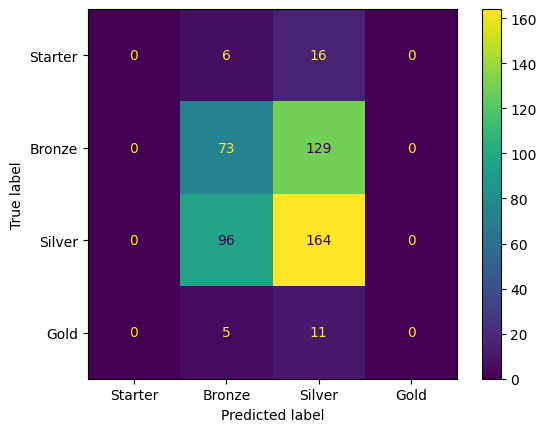

In [41]:
# Mostrar Matriz de Confusão
confusion_matrix_model = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model, display_labels=lista_segmentos)
disp.plot()

### Tuning Hiperparâmetros

In [42]:
# Ajustar Hiperparâmetros do modelo usando `optuna`
# min_samples_leaf = Mínimo de instâncias requerido para formar uma folha (nó terminal)
# max_depth = Profundidade máxima da árvore

def decision_tree_optuna(trial):
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_depth = trial.suggest_int("max_depth", 2, 8)
    
    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)
    
    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring="accuracy")
    
    return scores.mean()

In [43]:
# Executar a automação de experimentos
estudo_decision_tree = optuna.create_study(direction='maximize')
estudo_decision_tree.optimize(decision_tree_optuna, n_trials=200)


[I 2025-11-18 21:32:22,008] A new study created in memory with name: no-name-ba9cbb0c-6cd2-4365-8e1a-c54c730a38a1
[I 2025-11-18 21:32:22,028] Trial 0 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 1, 'max_depth': 7}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-11-18 21:32:22,048] Trial 1 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 1, 'max_depth': 7}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-11-18 21:32:22,066] Trial 2 finished with value: 0.4699877353726283 and parameters: {'min_samples_leaf': 8, 'max_depth': 3}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-11-18 21:32:22,084] Trial 3 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 15, 'max_depth': 5}. Best is trial 0 with value: 0.4739917754851743.
[I 2025-11-18 21:32:22,103] Trial 4 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 15, 'max_depth': 5}. Best is trial 0 with valu

In [44]:
# Mostrar melhor resultado e melhor conjunto de Hiperparâmetros
print(f"Melhor acurácia: {estudo_decision_tree.best_value}")
print(f"Melhor parâmetro: {estudo_decision_tree.best_params}")

Melhor acurácia: 0.4740518962075848
Melhor parâmetro: {'min_samples_leaf': 5, 'max_depth': 2}


### Visualizar - Árvore de decisão

In [48]:
# Preparar o conjunto de dados para treinar e conseguir visualizar a árvore
X_train_tree = X.copy()
X_train_tree['localizacao_label'] = X_train_tree['localizacao'].astype('category').cat.codes
X_train_tree['atividade_econimica_label'] = X_train_tree['atividade_economica'].astype('category').cat.codes
X_train_tree.drop(columns=['localizacao', 'atividade_economica'], axis=1, inplace=True)
X_train_tree.rename(columns={'localizacao_label': 'localizacao', 'atividade_econimica_label':'atividade_economica'}, inplace=True)
X_train_tree.head(10)


,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0
5,1629562.41,16,11,4,1,3
6,771179.95,13,0,1,3,3
7,707837.61,16,10,6,2,3
8,888983.66,17,10,1,0,1
9,1098512.64,13,9,3,1,2


In [50]:
# Treinar o modelo com o conjunto de Hiperparâmetros ideal

clf_decision_tree = DecisionTreeClassifier(min_samples_leaf=estudo_decision_tree.best_params['min_samples_leaf'], max_depth=estudo_decision_tree.best_params['max_depth'])

y_train_tree = y.copy()

clf_decision_tree.fit(X_train_tree, y_train_tree)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.8333333333333334, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.25, 0.5, 'faturamento_mensal <= 425959.422\ngini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [2, 0, 0, 11]\nclass = Gold'),
 Text(0.375, 0.16666666666666666, 'gini = 0.421\nsamples = 152\nvalue = [110, 0, 35, 7]\nclass = Starter'),
 Text(0.75, 0.5, 'faturamento_mensal <= 549601.438\ngini = 0.474\nsamples = 335\nvalue = [90.0, 16.0, 225.0, 4.0]\nclass = Silver'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 37\nvalue = [26, 0, 7, 4]\nclass = Starter'),
 Text(0.875, 0.16666666666666666, 'gini = 0.416\nsamples = 298\nvalue = [64.0, 16.0, 218.0, 0.0]\nclass = Silver')]

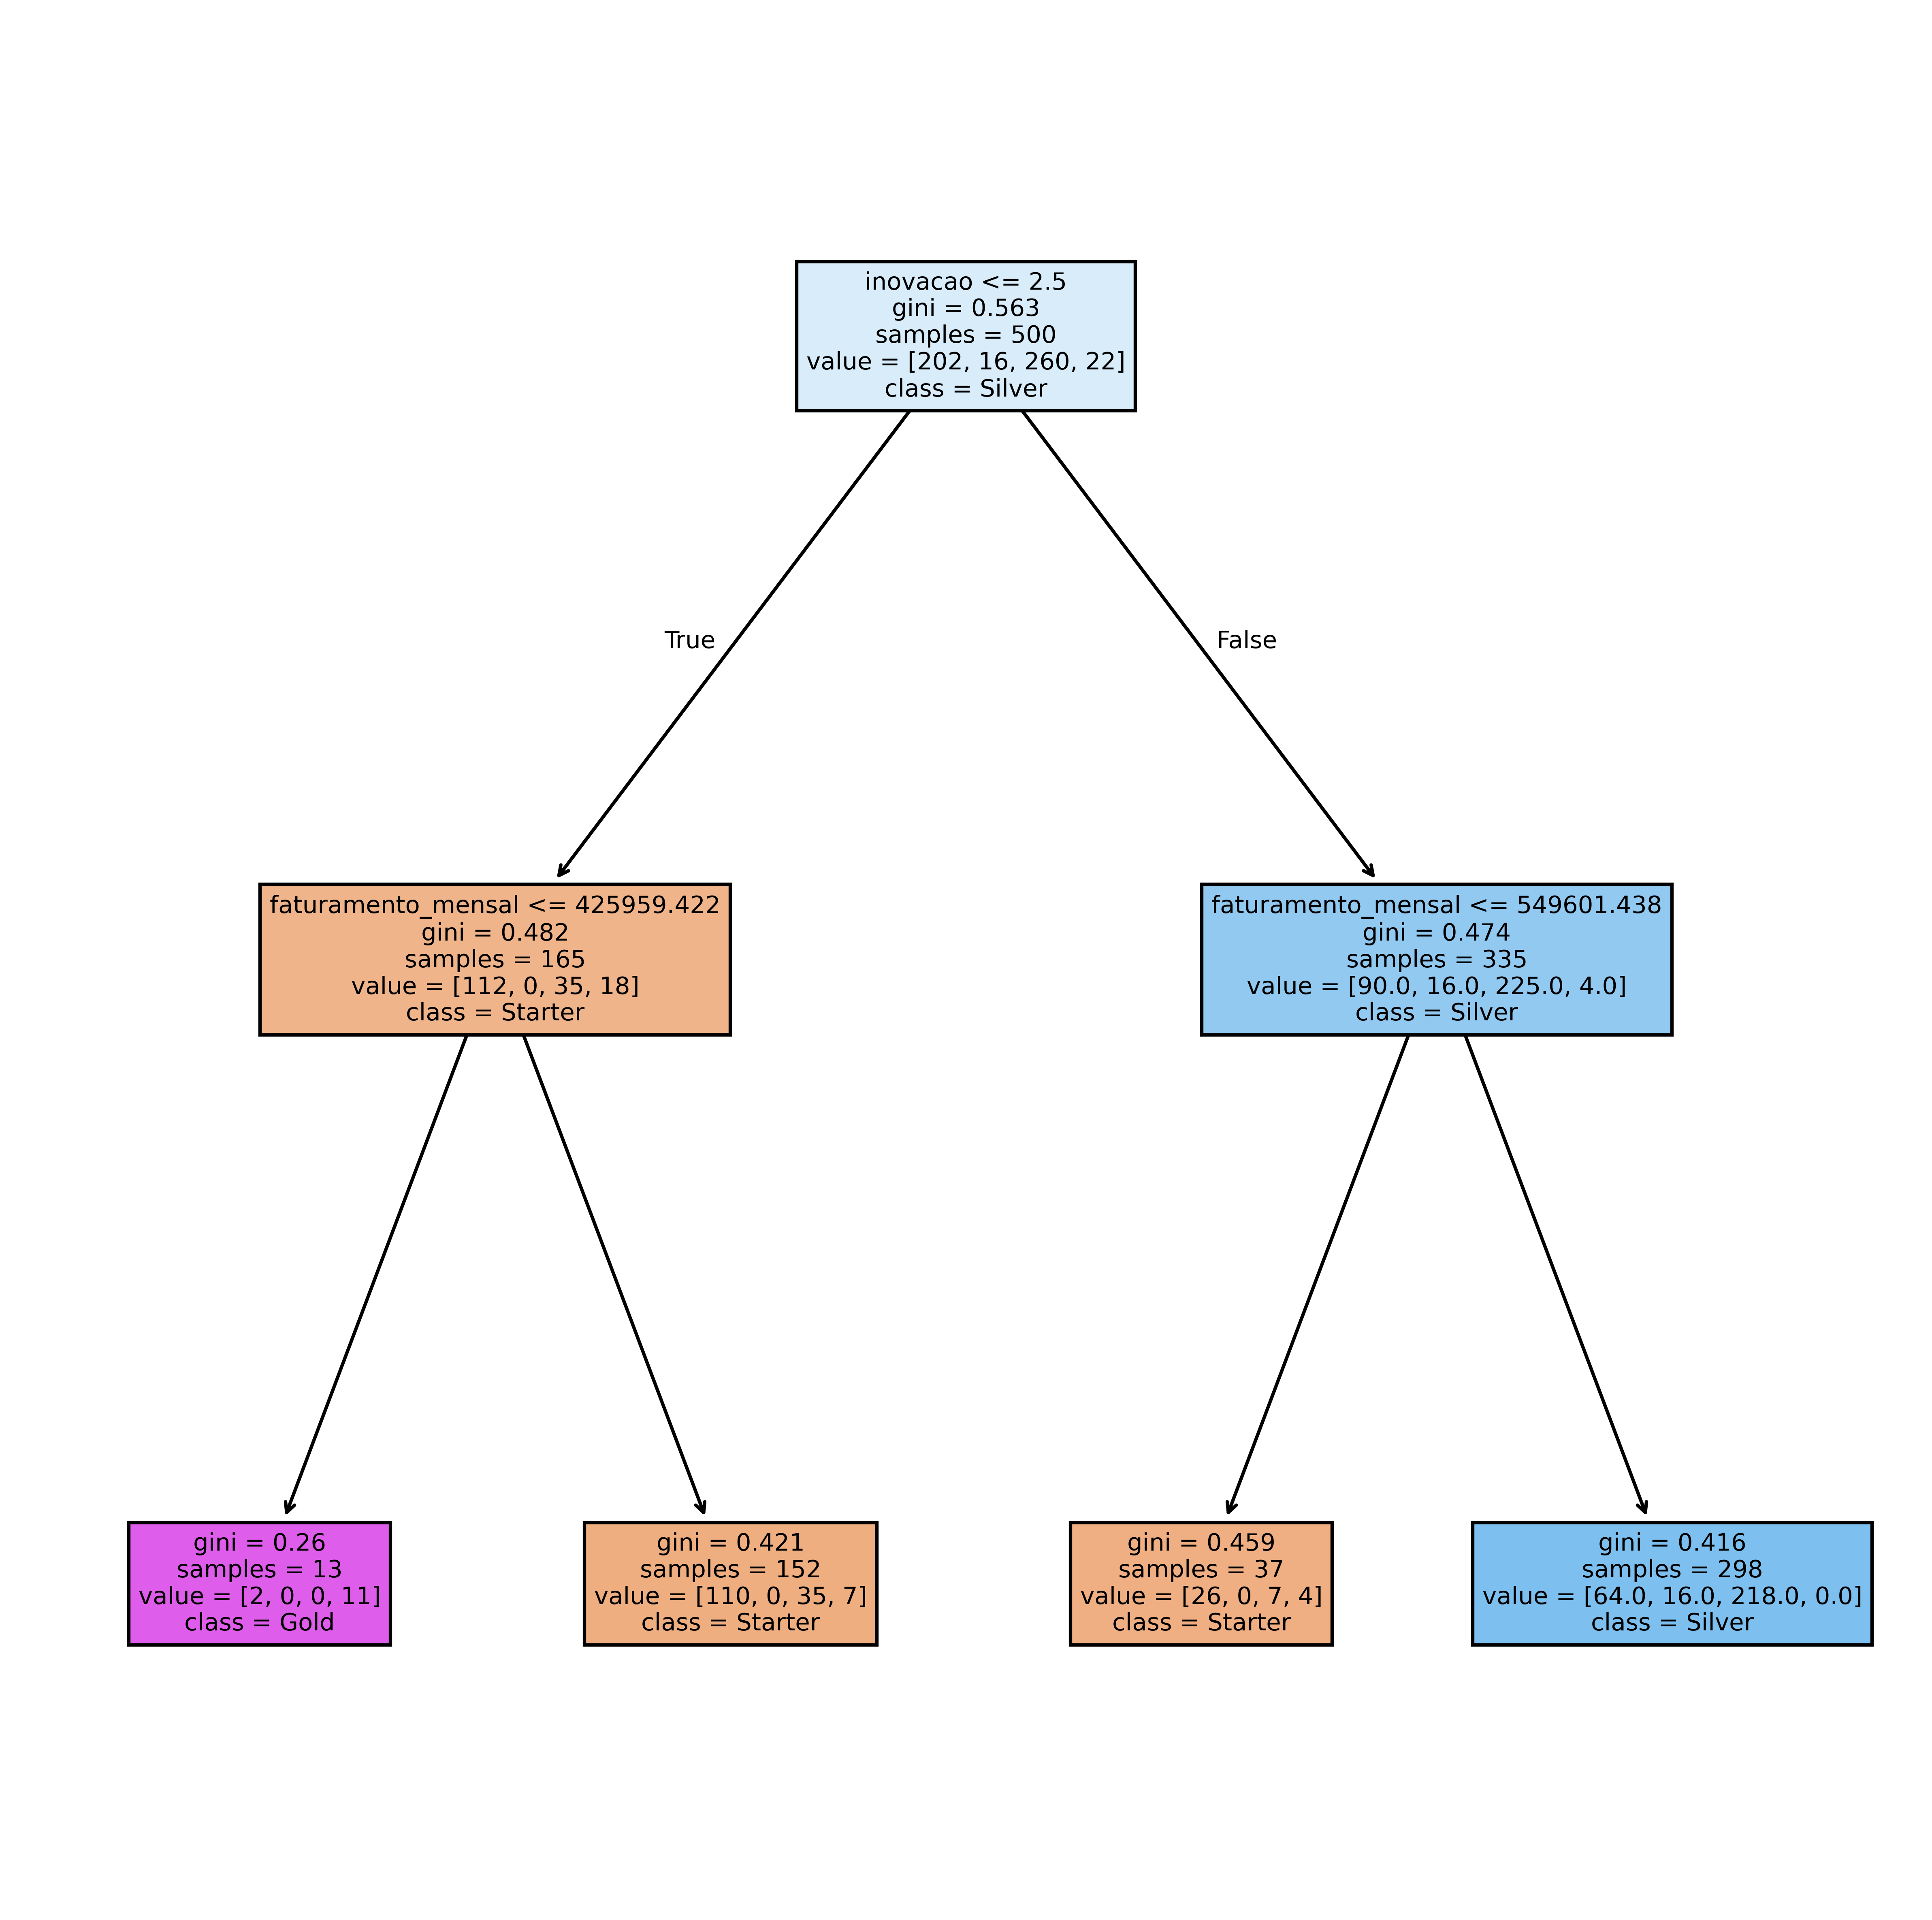

In [51]:
# Visualizar a árvore de decisão com Plot Tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=600)

plot_tree(clf_decision_tree, feature_names=X_train_tree.columns.to_numpy(), class_names=lista_segmentos, filled=True)

### Salvar Modelo

In [52]:
import joblib

In [53]:
# Criar um pipeline "tunado" 
dt_modelo_tunado = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        min_samples_leaf=estudo_decision_tree.best_params['min_samples_leaf'], 
        max_depth=estudo_decision_tree.best_params['max_depth']
        )
     )
])

# Treinar Modelo Tunado
dt_modelo_tunado.fit(X, y)

# Salvar Modelo
joblib.dump(dt_modelo_tunado, './modelo_classificacao_descision_tree.pkl')


['./modelo_classificacao_descision_tree.pkl']

### Entregar modelo como App de Predição Batch (por arquivo)

In [54]:
import gradio as gr

In [57]:
modelo = joblib.load('./modelo_classificacao_descision_tree.pkl')

def predict(aquivo):
    df_empresas = pd.read_csv(aquivo.name)
    y_pred = modelo.predict(df_empresas)
    
    df_segmentos = pd.DataFrame(y_pred, columns=['segment_de_cliente'])
    df_predicoes = pd.concat([df_empresas, df_segmentos], axis=1)
    df_predicoes.to_csv('./predicoes.csv', index=False)
    
    return './predicoes.csv'

demo = gr.Interface(predict, gr.File(file_types=['.csv']), "file")

demo.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
